# Task 1: Analysis of Clinical Trials in the USA

This analysis focuses on exploring and understanding a large dataset of clinical trials registered in the USA. The dataset, sourced from ClinicalTrials.gov, contains over 500,000 records and includes fields such as trial type, study status, funding source, conditions treated, and trial start and end dates. The objective of this task is to extract meaningful insights that could help a pharmaceutical company better understand the market landscape. To achieve this, we employed SQL in Databricks to query the dataset efficiently, taking advantage of SQL's expressiveness and the scalability of Spark SQL. The tasks include summarising the types of clinical trials, identifying common medical conditions, calculating average trial durations, and analyzing trends in diabetes-related trials. Each task is accompanied by a detailed explanation and rationale for the steps taken.

In [0]:
%python
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Assignment1").getOrCreate()

file_path = "/FileStore/tables/Clinicaltrial_16012025.csv"

df = spark.read.csv(
    file_path,
    header=True,
    inferSchema=True,
    quote='"',
    escape='"', 
    multiLine=True 
)


df.printSchema()
display(df.limit(500))

root
 |-- NCT Number: string (nullable = true)
 |-- Study Title: string (nullable = true)
 |-- Acronym: string (nullable = true)
 |-- Study Status: string (nullable = true)
 |-- Conditions: string (nullable = true)
 |-- Interventions: string (nullable = true)
 |-- Sponsor: string (nullable = true)
 |-- Collaborators: string (nullable = true)
 |-- Enrollment: integer (nullable = true)
 |-- Funder Type: string (nullable = true)
 |-- Study Type: string (nullable = true)
 |-- Study Design: string (nullable = true)
 |-- Start Date: timestamp (nullable = true)
 |-- Completion Date: timestamp (nullable = true)



NCT Number,Study Title,Acronym,Study Status,Conditions,Interventions,Sponsor,Collaborators,Enrollment,Funder Type,Study Type,Study Design,Start Date,Completion Date
NCT05013879,Kinesiotape for Edema After Bilateral Total Knee Arthroplasty,null,COMPLETED,"Arthroplasty Complications|Arthroplasty, Replacement, Knee",DEVICE: Kinesio(R)Tape for edema control,Montefiore Medical Center,Burke Rehabilitation Hospital,65,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: TREATMENT,2021-10-18T00:00:00Z,2023-11-24T00:00:00Z
NCT00517179,Effect of Vardenafil on Blood Pressure in Patients With Erectile Dysfunction Who Received Concomitant Doxazosin GITS,null,COMPLETED,Prostatic Hyperplasia|Impotence,DRUG: Vardenafil 10mg,"Hospital Authority, Hong Kong",null,40,OTHER_GOV,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: CROSSOVER|Masking: DOUBLE|Primary Purpose: TREATMENT,2006-04-01T00:00:00Z,2007-05-01T00:00:00Z
NCT06714279,Laparoscopic-Assisted Transversus Abdominus Plane Block Versus Intraperitoneal Irrigation of Local Anesthetic for Patients Undergoing Laparoscopic Cholecystectomy,null,NOT_YET_RECRUITING,Laparoscopic Cholecystectomy|TAP Block|Local Anesthetic,DRUG: Tap Block - Bupivacaine|DRUG: Intraperitoneal infiltration to liver,"Royal College of Surgeons, Ireland",null,144,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT,2025-01-01T00:00:00Z,2025-01-01T00:00:00Z
NCT05600179,OCTA in Epivascular Glia After Dex Implant,null,COMPLETED,Diabetic Retinopathy,DRUG: Dexamethasone intravitreal implant,Federico II University,null,38,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2021-01-01T00:00:00Z,2022-09-30T00:00:00Z
NCT01511679,Brain-imaging and Adolescent Neuroscience Consortium,BANC,WITHDRAWN,Alcohol Abuse,null,Boston Children's Hospital,Massachusetts General Hospital|Mclean Hospital|Massachusetts Institute of Technology,0,OTHER,OBSERVATIONAL,Observational Model: |Time Perspective: p,2012-09-01T00:00:00Z,2017-09-01T00:00:00Z
NCT05602779,Leverage Noninvasive Transcutaneous Vagus Nerve Stimulation to Reduce Suicidal Behaviors in Vulnerable Adolescents,null,RECRUITING,Self Harm|Suicidal Ideation,DEVICE: tVns Program|OTHER: Phone App Program|COMBINATION_PRODUCT: tVNS and Phone App Program|OTHER: Enhanced Treatment as Usual,University of Notre Dame,University of Rochester,212,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: SINGLE (PARTICIPANT)|Primary Purpose: PREVENTION,2023-10-08T00:00:00Z,2027-09-30T00:00:00Z
NCT04175379,The Effect of Permissive Hypercapnia on Oxygenation and Post-operative Pulmonary Complication During One-lung Ventilation,null,UNKNOWN,Thoracic Surgery,OTHER: group 40|OTHER: group 50|OTHER: group 60,Yonsei University,null,279,OTHER,INTERVENTIONAL,"Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: TRIPLE (PARTICIPANT, CARE_PROVIDER, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT",2019-11-25T00:00:00Z,2021-10-01T00:00:00Z
NCT01126879,Genistein in Treating Patients With Prostate Cancer,null,TERMINATED,Adenocarcinoma of the Prostate|Recurrent Prostate Cancer|Stage I Prostate Cancer|Stage II Prostate Cancer|Stage III Prostate Cancer,DIETARY_SUPPLEMENT: genistein|OTHER: placebo|PROCEDURE: therapeutic conventional surgery,Northwestern University,National Cancer Institute (NCI),12,OTHER,INTERVENTIONAL,"Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (PARTICIPANT, INVESTIGATOR)|Primary Purpose: TREATMENT",2011-02-03T00:00:00Z,2013-12-28T00:00:00Z
NCT03058679,Trial of Specific Carbohydrate and Mediterranean Diets to Induce Remission of Crohn's Disease,DINE-CD,COMPLETED,Crohn Disease,OTHER: Diet,University of Pennsylvania,"Patient-Centered Outcomes Research Institute|Crohn's and Colitis Foundation|University of North Carolina, Chapel Hill",197,OTHER,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|

## Task 1.1: Frequency of Clinical Trial Types

In this query, I examined the distribution of different types of clinical trials recorded in the dataset. The 'Study Type' column specifies whether a study is interventional, observational, or of another type. I performed a simple aggregation using SQL by grouping records based on the 'Type' and counting the occurrences of each. This helps us identify the most common formats of clinical trials and provides a quick overview of the research focus in the healthcare sector. The query also includes sorting in descending order of frequency to highlight the most prevalent study types. This insight is valuable for strategic planning and resource allocation, as pharmaceutical companies may wish to prioritise formats that are more common or more widely accepted in regulatory pathways.

In [0]:
%python
df.createOrReplaceTempView("clinical_trials")


In [0]:
SELECT `Study Type`, COUNT(*) AS frequency
From clinical_trials
Group BY `Study Type`
Order By frequency Desc
LIMIT 10

Study Type,frequency
INTERVENTIONAL,399888
OBSERVATIONAL,120906
EXPANDED_ACCESS,966
null,900


## Data Cleaning and Transformation Rationale

During the analysis, several data cleaning and transformation steps were performed to ensure meaningful results. One key transformation involved splitting the Conditions column using SPLIT() and EXPLODE() due to the multi-valued nature of this field. Another essential step was standardising condition names by applying UPPER() and TRIM() to address inconsistencies such as case sensitivity and whitespace. Additionally, I filtered out null and empty strings to avoid skewed counts in frequency analysis.

I also made efforts to detect and consolidate variations of the same condition using REGEXP_REPLACE to remove special characters such as hyphens, parentheses, and spaces from condition names. This allowed me to merge entries like 'COVID-19', 'COVID 19', and 'COVID19' under one normalized term. Furthermore, I reviewed condition counts to manually identify potential synonyms or typos (e.g., 'T2D' vs. 'TYPE 2 DIABETES') and discussed the potential for using fuzzy matching or mapping tables for more advanced harmonization. These transformations are crucial in big data environments where inconsistencies and formatting issues are common. Ignoring such issues could lead to inaccurate aggregations or misleading trends.

In [0]:
SELECT DISTINCT `Study Type` FROM clinical_trials

Study Type
INTERVENTIONAL
OBSERVATIONAL
null
EXPANDED_ACCESS


In [0]:
SELECT COUNT(*) AS total_count
FROM clinical_trials


total_count
522660


## Task 1.2: Top 10 Most Frequent Medical Conditions

Clinical trials often address multiple medical conditions simultaneously. These conditions are listed in a single column and separated by semicolons. To analyze the frequency of specific conditions, we must first split this column into individual entries. Using SQL's split and explode functions, we transform the string values into multiple rows—each representing a single condition. We further clean the data by applying TRIM() and UPPER() functions to standardise the case and remove extra spaces. This normalization is essential for accurate counting since inconsistent formatting can result in duplicates.

Additionally, we noticed that similar conditions were written in various formats—for example, 'COVID-19', 'COVID 19', and 'COVID19'. To address this, we used REGEXP_REPLACE to remove special characters and extra spaces from condition names, effectively merging variants of the same condition into a single standardized label. This helped ensure that the most frequent conditions were not artificially undercounted due to formatting inconsistencies. After grouping and counting, we selected the top 10 most frequently studied conditions. This output provides insights into the diseases that receive the most research attention, which can guide future investments in therapeutic areas with high trial volume.

In [0]:

SELECT Normalized_Condition, COUNT(*) AS frequency
FROM (
    SELECT UPPER(TRIM(REGEXP_REPLACE(Condition, '[^A-Za-z0-9 ]', ''))) AS Normalized_Condition
    FROM (
        SELECT EXPLODE(SPLIT(Conditions, ',')) AS Condition FROM clinical_trials
    )
)
WHERE Normalized_Condition IS NOT NULL AND Normalized_Condition != ''
GROUP BY Normalized_Condition
ORDER BY frequency DESC
LIMIT 10


Normalized_Condition,frequency
HEALTHY,8644
BREAST CANCER,4823
DIABETES MELLITUS,3889
PAIN,2927
OBESITY,2917
PROSTATE CANCER,2797
COVID19,2678
STROKE,2653
ASTHMA,2453
TYPE 2,2334


In [0]:
SELECT Normalized_Condition, COUNT(*) AS frequency
FROM (
    SELECT UPPER(TRIM(REGEXP_REPLACE(Condition, '[^A-Za-z0-9 ]', ''))) AS Normalized_Condition
    FROM (
        SELECT EXPLODE(SPLIT(Conditions, ',')) AS Condition FROM clinical_trials
    )
)
WHERE Normalized_Condition LIKE '%DIABETES%' OR Normalized_Condition LIKE '%COVID%'
GROUP BY Normalized_Condition
ORDER BY frequency DESC



Normalized_Condition,frequency
DIABETES MELLITUS,3889
COVID19,2678
TYPE 2 DIABETES,1255
TYPE 2 DIABETES MELLITUS,1234
DIABETES,837
TYPE 1 DIABETES,768
DIABETESDIABETES MELLITUS,577
TYPE 1 DIABETES MELLITUS,481
PREDIABETES,217
TYPE 1DIABETES MELLITUS,178


In [0]:
SELECT UPPER(TRIM(Condition)) AS Condition, COUNT(*) AS frequency
FROM (
    SELECT EXPLODE(SPLIT(Conditions, ',')) AS Condition FROM clinical_trials
)
WHERE Condition IS NOT NULL AND TRIM(Condition) != ''
GROUP BY UPPER(TRIM(Condition))
ORDER BY frequency DESC
LIMIT 10;


Condition,frequency
HEALTHY,8644
BREAST CANCER,4822
DIABETES MELLITUS,3888
PAIN,2926
OBESITY,2916
PROSTATE CANCER,2796
STROKE,2650
ASTHMA,2452
TYPE 2,2332
HIV INFECTIONS,2146


## Task 1.3: Calculating the Average Clinical Trial Duration

Understanding the average duration of clinical trials can help estimate timelines for drug development and approval processes. For this task, we calculate the trial duration in months using the 'StartDate' and 'CompletionDate' columns. Both dates are converted from string format to date objects using TO_DATE. Then we use months_between to calculate the time difference in months. To ensure data accuracy, we filter out records with null values in either date column. This prevents errors in calculations and ensures that the results reflect only completed trials. Finally, we compute the average of these durations and round the result for readability. This information is vital for project management and forecasting within clinical research organizations.




In [0]:
SELECT AVG(MONTHS_BETWEEN(TO_DATE(`Completion Date`, 'yyyy-MM-dd'), TO_DATE(`Start Date`, 'yyyy-MM-dd'))) AS Avg_Trial_Length
FROM clinical_trials
WHERE `Completion Date` IS NOT NULL AND `Start Date` IS NOT NULL


Avg_Trial_Length
35.571473612544345


## Task 1.4: Diabetes-Related Trials by Year

This task focuses on identifying trends in completed clinical trials related to diabetes. We filter the dataset to include only those trials that have a StudyStatus of 'Completed' and a non-null CompletionDate. Then, using a LIKE condition, we search for entries in the Conditions column that contain the word 'Diabetes'. The year of completion is extracted using SQL’s year() function. We then group and count the records by year to observe how the volume of diabetes-related trials has evolved over time. This trend can indicate growing or waning research interest in diabetes, which is crucial for pharmaceutical companies targeting this chronic disease market. The results are later visualised for a clearer and more engaging representation of the yearly distribution.

In [0]:
WITH filtered AS (
  SELECT 
    `Completion Date`,
    TO_DATE(`Completion Date`, 'MMM dd, yyyy') AS completion_date_parsed,
    year(TO_DATE(`Completion Date`, 'MMM dd, yyyy')) AS year
  FROM clinical_trials
  WHERE `Study Status` = 'COMPLETED'
    AND Conditions LIKE '%Diabetes%'
    AND `Completion Date` IS NOT NULL
)
SELECT 
  year,
  COUNT(*) AS diabetes_trials
FROM filtered
GROUP BY year
ORDER BY year
LIMIT 10;


year,diabetes_trials
1989,2
1990,1
1991,1
1992,3
1993,3
1994,2
1995,2
1996,2
1997,3
1998,10


## Visualisation of Diabetes Trial Trends

To complement the SQL analysis of diabetes-related trials, a visual representation was created using Python and Matplotlib. After executing the SQL query to count diabetes-related completed trials by year, the result was converted into a Pandas DataFrame. This format allowed us to plot the data as a line chart, showing the number of studies per year. The x-axis represents the year, while the y-axis shows the count of completed studies. Visualisation makes it easier to spot trends, such as peaks or declines in research activity. In this case, the line chart helps highlight whether attention toward diabetes research has increased, remained stable, or decreased over the years. This visual summary is especially helpful for stakeholders who prefer graphical insights over raw numbers.

In [0]:
%python
diabetes_trend_df = spark.sql("""
    WITH filtered AS (
        SELECT 
            year(TO_DATE(`Completion Date`, 'MMM dd, yyyy')) AS year
        FROM clinical_trials
        WHERE `Study Status` = 'COMPLETED'
          AND Conditions LIKE '%Diabetes%'
          AND `Completion Date` IS NOT NULL
    )
    SELECT 
        year,
        COUNT(*) AS diabetes_trials
    FROM filtered
    GROUP BY year
    ORDER BY year
""")


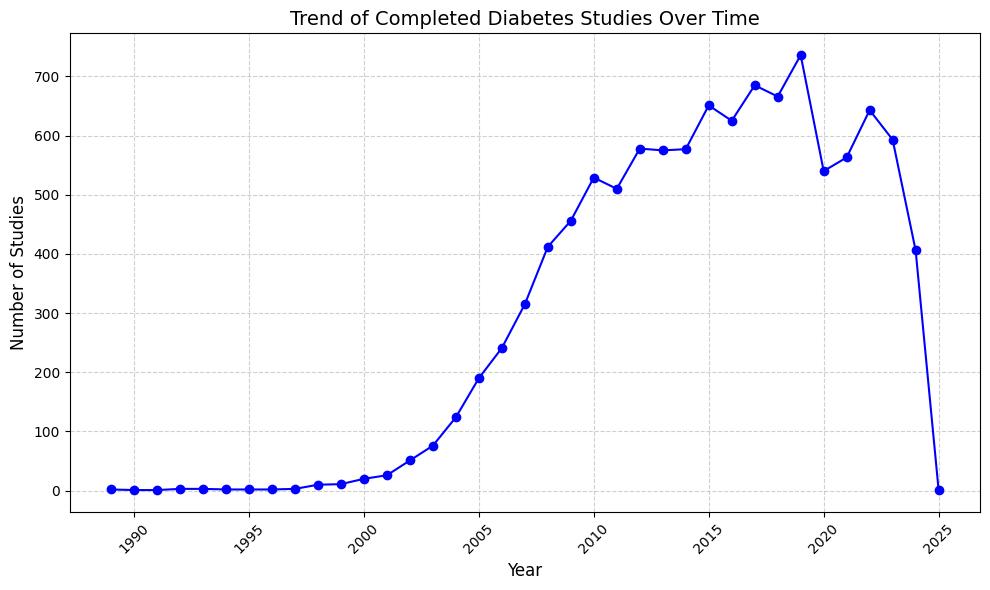

In [0]:
%python
import matplotlib.pyplot as plt

pandas_df = diabetes_trend_df.toPandas()

pandas_df = pandas_df.dropna()

plt.figure(figsize=(10, 6))
plt.plot(pandas_df['year'], pandas_df['diabetes_trials'], marker='o', linestyle='-', color='blue')
plt.title('Trend of Completed Diabetes Studies Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Studies', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Insights Gained and Business Implications

From my analysis, I learned that interventional studies are the most common type of clinical trials. The most frequently studied medical conditions include diabetes, cancer types (e.g., breast cancer, prostate cancer), and chronic illnesses like hypertension and asthma. The average trial duration varies but provides a useful benchmark for project planning. Furthermore, the trend analysis of diabetes-related trials revealed how research focus has shifted over time, which can reflect changes in funding, public health priorities, or scientific advancements. These insights can help pharmaceutical companies identify competitive spaces, gaps in the market, and strategic areas for future clinical research.